# Librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn import preprocessing

# Google Colab o Local

In [2]:
# Verificamos si estamos en Colab
var_google_colab = 'google.colab' in str(get_ipython())
print(var_google_colab)
if var_google_colab:
  #Montamos nuestro G.Drive
  from google.colab import drive
  drive.mount('/content/gdrive',force_remount=True)
  # Direccion root donde está la jupyter-notebook
  root_path = "/content/gdrive/My Drive/ciencia_de_datos_2022_german_maestri"
  # Direccion donde guardaremos las imagenes
  plot_path = root_path
else:
  # Si, no estamos en google colab, es que estamos corriendo la en local
  root_path = ""
  plot_path = root_path

# Cargamos el dataset

if var_google_colab:
    bank_subscription_df = pd.read_csv(root_path + "/bank_subscription.csv")
else:
    bank_subscription_df = pd.read_csv(root_path + "bank_subscription.csv")

False


# 1. Limpieza

In [3]:
# Lo limpiamos tal como se realizó en el EDA

bank_subscription_df.drop_duplicates(inplace=True)
bank_subscription_df.dropna(inplace=True)
bank_subscription_df.drop('Unnamed: 0', inplace=True, axis = 1)
bank_subscription_df.drop('Pdays', inplace=True, axis = 1)
bank_subscription_df.rename(columns = {'Age':'age', 'Job':'job', 'Marital Status':'marital_status', 'Education':'education', 'Credit':'credit', 'Balance (euros)':'balance_euros', 'Housing Loan':'housing_loan', 'Personal Loan':'personal_loan', 'Contact':'contact', 'Last Contact Day':'last_contact_day', 'Last Contact Month':'last_contact_month', 'Last Contact Duration':'last_contact_duration', 'Campaign':'campaign', 'Previous':'previous', 'Poutcome':'poutcome', 'Subscription':'subscription'}, inplace = True)
bank_subscription_df.drop(29182, axis=0, inplace=True)

# 2. Preprocesamiento

In [4]:
# Convertimos las columnas 'credit', 'housing_loan' y 'personal_loan' en 0 y 1,
# de "no" y "yes" respectivamente

bank_subscription_df['credit'] = bank_subscription_df['credit'].map({'yes': 1, 'no': 0})
bank_subscription_df['housing_loan'] = bank_subscription_df['housing_loan'].map({'yes': 1, 'no': 0})
bank_subscription_df['personal_loan'] = bank_subscription_df['personal_loan'].map({'yes': 1, 'no': 0})
bank_subscription_df.head()

,age,job,marital_status,education,credit,balance_euros,housing_loan,personal_loan,contact,last_contact_day,last_contact_month,last_contact_duration,campaign,previous,poutcome,subscription
11,29.0,admin.,single,secondary,0,390.0,1,0,unknown,5,may,137.0,1,0,unknown,1
15,51.0,retired,married,primary,0,229.0,1,0,unknown,5,may,353.0,1,0,unknown,1
19,33.0,services,married,secondary,0,0.0,1,0,unknown,5,may,54.0,1,0,unknown,1
21,56.0,management,married,tertiary,0,779.0,1,0,unknown,5,may,164.0,1,0,unknown,1
24,40.0,retired,married,primary,0,0.0,1,1,unknown,5,may,181.0,1,0,unknown,1


In [5]:
# Creamos dummies para las variables categóricas

dummies = pd.get_dummies(data=bank_subscription_df)

# Dejamos sólo los dummies en el dataframe creado

dummies.drop('age', inplace=True, axis=1)
dummies.drop('balance_euros', inplace=True, axis=1)
dummies.drop('last_contact_day', inplace=True, axis=1)
dummies.drop('last_contact_duration', inplace=True, axis=1)
dummies.drop('campaign', inplace=True, axis=1)
dummies.drop('previous', inplace=True, axis=1)
dummies.drop('subscription', inplace=True, axis=1)
dummies.head()

,credit,housing_loan,personal_loan,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,last_contact_month_jun,last_contact_month_mar,last_contact_month_may,last_contact_month_nov,last_contact_month_oct,last_contact_month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
11,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
15,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
19,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
21,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
24,0,1,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [6]:
# Eliminamos todas las variables binarias del df principal, para poder realizar
# un standard scaler a las variables numéricas

bank_subscription_df.drop('job', inplace=True, axis=1)
bank_subscription_df.drop('marital_status', inplace=True, axis=1)
bank_subscription_df.drop('education', inplace=True, axis=1)
bank_subscription_df.drop('credit', inplace=True, axis=1)
bank_subscription_df.drop('housing_loan', inplace=True, axis=1)
bank_subscription_df.drop('personal_loan', inplace=True, axis=1)
bank_subscription_df.drop('contact', inplace=True, axis=1)
bank_subscription_df.drop('last_contact_month', inplace=True, axis=1)
bank_subscription_df.drop('poutcome', inplace=True, axis=1)
bank_subscription_df.head()

,age,balance_euros,last_contact_day,last_contact_duration,campaign,previous,subscription
11,29.0,390.0,5,137.0,1,0,1
15,51.0,229.0,5,353.0,1,0,1
19,33.0,0.0,5,54.0,1,0,1
21,56.0,779.0,5,164.0,1,0,1
24,40.0,0.0,5,181.0,1,0,1


In [7]:
# Separamos de antemano la columna subscription, nombrandola como Y para luego
# separarla como Y_train e Y_test

Y=bank_subscription_df.copy()
Y.drop('age', inplace=True, axis=1)
Y.drop('balance_euros', inplace=True, axis=1)
Y.drop('last_contact_day', inplace=True, axis=1)
Y.drop('last_contact_duration', inplace=True, axis=1)
Y.drop('campaign', inplace=True, axis=1)
Y.drop('previous', inplace=True, axis=1)

In [8]:
# La eliminamos del df principal

bank_subscription_df.drop('subscription', inplace=True, axis=1)

# Temporalmente, nombraremos X al nuevo DF para separalo en X_train y X_test
# y poder realizar un standard scaler. Luego, unificaremos a las dummies,
# previamente separando estas en test y train también

X = bank_subscription_df

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
dummies_train, dummies_test = train_test_split(dummies, test_size=0.20, random_state=42)

In [9]:
# Realizamos un scaler a x

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scal = scaler.transform(X_train)
X_test_scal = scaler.transform(X_test)

In [10]:
# Unificamos los dummies_train y dummies_test a X_train y X_test respectivamente

dummies_train=dummies_train.to_numpy()
dummies_test=dummies_test.to_numpy()

X_train_scal = np.concatenate((X_train_scal, dummies_train), axis=1)
X_test_scal = np.concatenate((X_test_scal, dummies_test), axis=1)

# Finalmente, nos quedamos con el train y test, escalados y variables binarias
# donde corresponda

In [11]:
# Un último cambio que haremos, es en vez de que sean 1 y 2 los resultados de
# la feature "subscription", pasarán a ser 0 y 1, por una cuestión de orden.
# Simplemente restaremos 1 a cada valor para que queden: 0 los no subscriptos
# y 1 los efectivamente subscriptos

# Lo volvemos a separar en train y test

Y['subscription']=Y.subscription-1
Y_train, Y_test = train_test_split(Y, test_size=0.20, random_state=42)

# 3. Modelo

In [12]:
# Definimos los parámetros
param_grid = {'C': [0.1, 1, 10, 100], 
              'gamma': [0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'linear']} 
  
svc = svm.SVC(probability=True)

grid = GridSearchCV(svc, param_grid, refit = True, verbose = 3)
  
# Fitteamos a cada combinación para definir la grilla
grid.fit(X_train_scal, Y_train.values.ravel())

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.884 total time=   5.6s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.883 total time=   5.6s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.889 total time=   5.5s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.884 total time=   5.6s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.884 total time=   5.7s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.885 total time=   2.9s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.887 total time=   2.9s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.895 total time=   2.9s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.897 total time=   2.9s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.896 total time=   2.9s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.878 total time=   5.3s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.889 total time=   5.3s
[CV 3/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.892 total time=   5.0s
[CV 4/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.891 total time=   5.0s
[CV 5/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.896 total time=   5.0s
[CV 1/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.885 total time=   9.7s
[CV 2/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.887 total time=  10.3s
[CV 3/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.894 total time=   9.6s
[CV 4/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.899 total time=   9.9s
[CV 5/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.896 total time=   9.9s
[CV 1/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.878 total time=   5.2s
[CV 2/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.878 total time=   5.2s
[CV 3/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.878 total time=   5.1s
[CV 4/5] END ....C=10, gamma

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

In [13]:
Y_pred = grid.predict(X_test_scal)

In [14]:
# Computo el accuracy (comparar Y_test vs Y_pred)
test_acc = accuracy_score(Y_test, Y_pred)
print("El accuracy es " + str(test_acc))

El accuracy es 0.9069334574220568


In [15]:
# AUC
Y_proba = grid.predict_proba(X_test_scal)
fpr1, tpr1, thresholds = roc_curve(Y_test.astype('int'), Y_proba[:,1], drop_intermediate = False)
auc_value = auc(fpr1, tpr1)
print("El AUC es = " + str(auc_value))

El AUC es = 0.9043987820105588


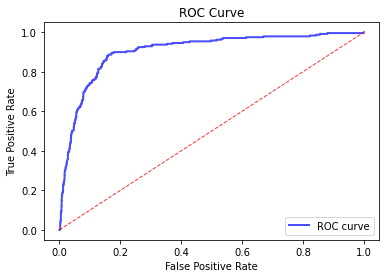

In [16]:
plt.plot(fpr1, tpr1, lw=2, alpha=0.7 , label = 'ROC curve', color = 'b')
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='r', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(False)
plt.legend(loc="lower right")
plt.title('ROC Curve')
plt.show()

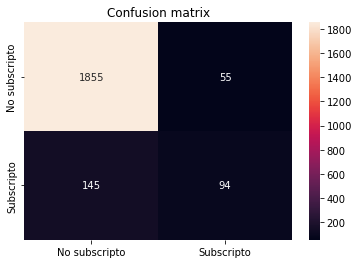

In [17]:
# Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)
df_cm = pd.DataFrame(cm, index = ['No subscripto', 'Subscripto'], columns = ['No subscripto', 'Subscripto'])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True,fmt='g')
plt.title('Confusion matrix')
plt.show()